Importing libraries

In [304]:
import warnings
warnings.filterwarnings('ignore')

In [305]:
import os, datetime

import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [306]:
data = pd.read_csv('mushrooms.csv')

data.sample(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1523,e,x,f,n,f,n,f,w,b,n,...,f,w,w,p,w,o,e,n,s,g
6774,e,x,f,w,f,n,f,w,b,g,...,k,w,w,p,w,t,p,w,n,g
7922,e,k,s,n,f,n,a,c,b,o,...,s,o,o,p,o,o,p,y,c,l
7177,p,k,s,n,f,f,f,c,n,b,...,k,p,w,p,w,o,e,w,v,l
960,e,x,f,n,f,n,f,w,b,n,...,f,w,w,p,w,o,e,k,a,g


In [307]:
data['class'].unique()

array(['p', 'e'], dtype=object)

In [308]:
data.shape

(8124, 23)

In [309]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [310]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

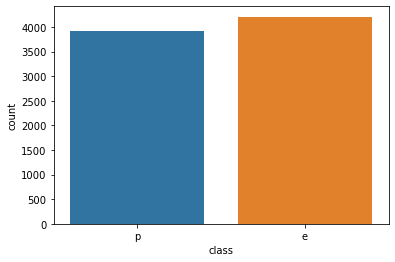

In [311]:
sns.countplot(data['class'])

In [312]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [313]:
df = pd.concat([data,pd.get_dummies(data['cap-shape'], prefix='cap-shape')],axis=1)

In [314]:
df = pd.concat([df,pd.get_dummies(data['cap-surface'], prefix='cap-surface')],axis=1)

In [315]:
df = pd.concat([df,pd.get_dummies(data['cap-color'], prefix='cap-color')],axis=1)

In [316]:
df = pd.concat([data,pd.get_dummies(data['bruises'], prefix='bruises')],axis=1)

In [317]:
df = pd.concat([data,pd.get_dummies(data['odor'], prefix='odor')],axis=1)

In [318]:
df = pd.concat([df,pd.get_dummies(data['gill-attachment'], prefix='gill-attachment')],axis=1)

In [319]:
df = pd.concat([df,pd.get_dummies(data['gill-spacing'], prefix='gill-spacing')],axis=1)

In [320]:
df = pd.concat([df,pd.get_dummies(data['gill-size'], prefix='gill-size')],axis=1)

In [321]:
df = pd.concat([df,pd.get_dummies(data['gill-color'], prefix='gill-color')],axis=1)

In [322]:
df = pd.concat([df,pd.get_dummies(data['stalk-shape'], prefix='stalk-shape')],axis=1)

In [323]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [324]:
df = pd.concat([df,pd.get_dummies(data['stalk-root'], prefix='stalk-root')],axis=1)

In [325]:
df = pd.concat([df,pd.get_dummies(data['stalk-surface-above-ring'], prefix='stalk-surface-above-ring')],axis=1)

In [326]:
df = pd.concat([df,pd.get_dummies(data['stalk-surface-below-ring'], prefix='stalk-surface-below-ring')],axis=1)

In [327]:
df = pd.concat([df,pd.get_dummies(data['veil-type'], prefix='veil-type')],axis=1)

In [328]:
df = pd.concat([df,pd.get_dummies(data['veil-color'], prefix='veil-color')],axis=1)

In [329]:
df = pd.concat([df,pd.get_dummies(data['ring-number'], prefix='ring-number')],axis=1)

In [330]:
df = pd.concat([df,pd.get_dummies(data['ring-type'], prefix='ring-type')],axis=1)

In [331]:
df = pd.concat([df,pd.get_dummies(data['spore-print-color'], prefix='spore-print-color')],axis=1)

In [332]:
df = pd.concat([df,pd.get_dummies(data['population'], prefix='population')],axis=1)

In [333]:
df = pd.concat([df,pd.get_dummies(data['habitat'], prefix='habitat')],axis=1)

In [334]:
df=df.drop(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing'],axis=1)
df=df.drop(['gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring'],axis=1)
df=df.drop(['stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],axis=1)

In [335]:
df.sample(10)

,class,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
5233,e,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3643,e,0,0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0
3487,e,0,0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0
4321,p,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
495,e,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2711,e,0,0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0
6027,p,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
3408,e,0,0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0
2871,e,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
5716,p,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


No Null features

Data Visualization

<AxesSubplot:xlabel='class', ylabel='count'>

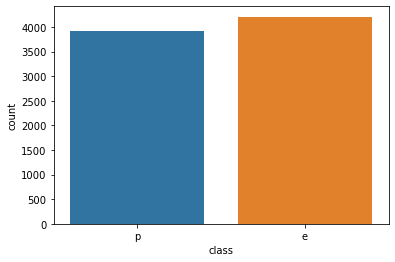

In [336]:
sns.countplot(x ='class', data = data)

In [337]:
data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

Replacing string values with integers in target column

In [338]:
type(df)

pandas.core.frame.DataFrame

In [339]:
df['class'].unique()

array(['p', 'e'], dtype=object)

In [340]:
class_att = {'p':0, 'e':1}

df['class'].replace(class_att, inplace=True)

df[['class']].sample(10)

,class
611,1
4944,0
2305,1
2671,1
2089,0
7504,0
1022,1
6493,0
5167,0
7744,1


Splitting the data

In [343]:
features = df.drop('class', axis=1)

target = df[['class']]

In [344]:
features.sample(5)

,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
7607,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
7201,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2396,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
6572,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4521,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0


In [345]:
target.sample(10)

,class
6486,0
5286,0
6834,0
3497,1
7443,1
3177,1
736,1
7331,0
5748,1
1919,1


Splitting dataset into training and testing data

In [346]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size = 0.2, 
                                                    random_state=1)

In [347]:
x_train.shape, y_train.shape

((6499, 77), (6499, 1))

In [348]:
x_test.shape, y_test.shape

((1625, 77), (1625, 1))

In [391]:
y_test.value_counts()

class
1        820
0        805
dtype: int64

In [349]:
x_train, x_val, y_train, y_val = train_test_split(x_train, 
                                                  y_train, 
                                                  test_size=0.15,
                                                  random_state=10)

In [350]:
x_train.shape, x_val.shape, x_test.shape

((5524, 77), (975, 77), (1625, 77))

In [351]:
y_train.shape, y_val.shape, y_test.shape

((5524, 1), (975, 1), (1625, 1))

Building the model

In [371]:
def build_model():
    
    inputs = tf.keras.Input(shape=(x_train.shape[1],))

    dense_layer1 = layers.Dense(16, activation='relu')
    x = dense_layer1(inputs)

    dropout_layer = layers.Dropout(0.3)
    x = dropout_layer(x)
    
    dense_layer2 = layers.Dense(8, activation='relu')
    x = dense_layer2(x)
    
    predictions_layer = layers.Dense(1, activation='sigmoid')
    predictions = predictions_layer(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=predictions)
    
    model.summary()
    
    model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=['accuracy', 
                           tf.keras.metrics.Precision(0.5),
                           tf.keras.metrics.Recall(0.5),])
    return model

In [372]:
model = build_model()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 77)]              0         
_________________________________________________________________
dense_38 (Dense)             (None, 16)                1248      
_________________________________________________________________
dropout_18 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_39 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 9         
Total params: 1,393
Trainable params: 1,393
Non-trainable params: 0
_________________________________________________________________


In [373]:
dataset_train = tf.data.Dataset.from_tensor_slices((x_train.values, y_train.values))
dataset_train = dataset_train.batch(16)

dataset_train.shuffle(128)

<ShuffleDataset shapes: ((None, 77), (None, 1)), types: (tf.uint8, tf.int64)>

In [374]:
num_epochs = 100

In [375]:
dataset_val = tf.data.Dataset.from_tensor_slices((x_val.values, y_val.values))
dataset_val = dataset_val.batch(16)

In [376]:
model = build_model()

training_history = model.fit(dataset_train, epochs=num_epochs, validation_data=dataset_val)

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 77)]              0         
_________________________________________________________________
dense_41 (Dense)             (None, 16)                1248      
_________________________________________________________________
dropout_19 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_42 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 9         
Total params: 1,393
Trainable params: 1,393
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
346/346 [==============================] - 2s 5ms/step - loss: 0.3692 - accuracy: 0.8441 - precision_11: 0.785

Plotting accuracy

In [377]:
training_history.history.keys()

dict_keys(['loss', 'accuracy', 'precision_11', 'recall_11', 'val_loss', 'val_accuracy', 'val_precision_11', 'val_recall_11'])

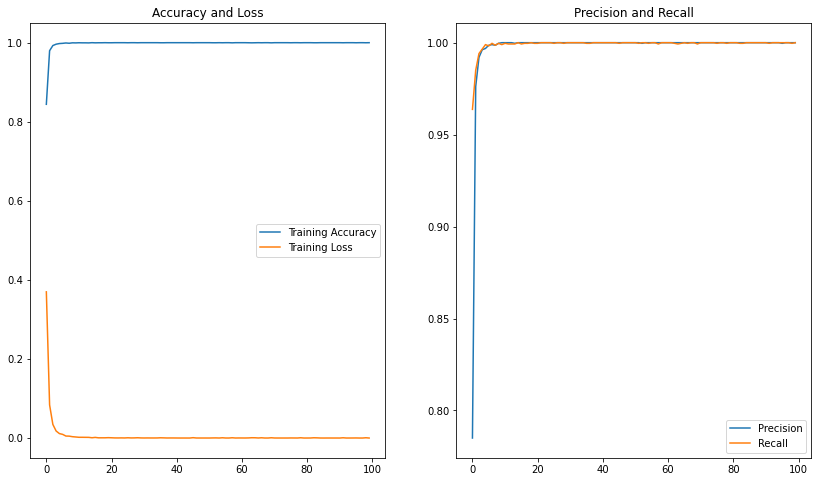

In [379]:
train_acc = training_history.history['accuracy']
train_loss = training_history.history['loss']

precision = training_history.history['precision_11']
recall = training_history.history['recall_11']

epochs_range = range(num_epochs)

plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)

plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, train_loss, label='Training Loss')

plt.title('Accuracy and Loss')
plt.legend()

plt.subplot(1, 2, 2)

plt.plot(epochs_range, precision, label='Precision')
plt.plot(epochs_range, recall, label='Recall')

plt.title('Precision and Recall')
plt.legend()

Model evaluation

In [380]:
score = model.evaluate(x_test, y_test)

score_df = pd.Series(score, index = model.metrics_names)

score_df

1625/1625 [==============================] - 0s 31us/sample - loss: 3.6621e-07 - accuracy: 1.0000 - precision_11: 1.0000 - recall_11: 1.0000


loss            3.662073e-07
accuracy        1.000000e+00
precision_11    1.000000e+00
recall_11       1.000000e+00
dtype: float64

Prediction

In [381]:
y_pred = model.predict(x_test)

y_pred[:10]

array([[1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.]], dtype=float32)

In [382]:
y_pred = np.where(y_pred>=0.5, 1, y_pred)

y_pred = np.where(y_pred<0.5, 0, y_pred)

In [383]:
y_pred[:10]

array([[1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.]], dtype=float32)

In [384]:
pred_results = pd.DataFrame({'y_test': y_test.values.flatten(),
                             'y_pred': y_pred.flatten().astype('int32') }, index = range(len(y_pred)))

In [385]:
pred_results.sample(10)

,y_test,y_pred
1456,1,1
464,1,1
1405,0,0
471,0,0
246,1,1
776,1,1
437,0,0
1250,0,0
515,1,1
1482,1,1


In [386]:
pd.crosstab(pred_results.y_pred, pred_results.y_test)

y_test,0,1
y_pred,,
0,805,0
1,0,820


In [387]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [388]:
accuracy_score(y_test, y_pred)

1.0

In [389]:
precision_score(y_test, y_pred)

1.0

In [390]:
recall_score(y_test, y_pred)

1.0